# India´s Air Pollutants Visualization
#### Author: [douglasparism](https://github.com/douglasparism) on June 09th 2021

This notebook is intended to show how to visualize data on a map, learning geographical visualization. India is known for several things, including pollution. As a good example, India´s Air Quality will be displayed through Geopandas in a heatmap.

#### 1. Setting-up 

In [1]:
# Importing Necessary Packagimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# As good practice, we will use the OS library to interact with the computer files
path = r'data'
abspath = os.path.abspath(path)

The dataset used can be found in [Air Pollution in India](https://www.kaggle.com/venky73/airquality), which the description is:

* Dataset Owner: Indian GOVT Description of Data: The real-time data as collected from the field instruments is displayed live without human intervention from CPCB. It is likely that the live data may display some errors or abnormal values. Any abnormal value may be due to any episode or instrumental error at any particular time.
It contains Real time National Air Quality Index values from different monitoring stations across India. The pollutants monitored are Sulphur Dioxide (SO2), Nitrogen Dioxide (NO2), Particulate Matter (PM10 and PM2.5) , Carbon Monoxide (CO), Ozone(O3) etc

In [3]:
# Import AirQuality data
data = pd.read_csv(abspath+"\\AirQuality.csv")
data.head(5)

,Country,State,city,place,lastupdate,Avg,Max,Min,Pollutants
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00:00,70.0,108.0,42.0,PM2.5
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00:00,76.0,102.0,43.0,PM10
2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00:00,73.0,118.0,46.0,NO2
3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00:00,5.0,6.0,4.0,NH3
4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00:00,41.0,109.0,2.0,SO2


#### 2. Data cleansing and validation

In [4]:
# Delete unnecessary columns
del data['lastupdate']
del data['place']
del data['Country']
data.head(5)

,State,city,Avg,Max,Min,Pollutants
0,Andhra_Pradesh,Amaravati,70.0,108.0,42.0,PM2.5
1,Andhra_Pradesh,Amaravati,76.0,102.0,43.0,PM10
2,Andhra_Pradesh,Amaravati,73.0,118.0,46.0,NO2
3,Andhra_Pradesh,Amaravati,5.0,6.0,4.0,NH3
4,Andhra_Pradesh,Amaravati,41.0,109.0,2.0,SO2


In [5]:
# Checking the Data Type
display(data.dtypes)

#Lets check how many categories are in State Column 
print("\nUnique Values in a State column: \n",data.State.unique())

#Lets check how many age groups are in City Column
print("\nUnique Values in a city column: \n",data.city.unique())

#Lets check how many age groups are in Pollutants Column
print("\nUnique Values in a Pollutants column: \n",data.Pollutants.unique())

State          object
city           object
Avg           float64
Max           float64
Min           float64
Pollutants     object
dtype: object


Unique Values in a State column: 
 ['Andhra_Pradesh' 'Bihar' 'Delhi' 'Gujarat' 'Haryana' 'Jharkhand'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Odisha' 'Punjab'
 'Rajasthan' 'TamilNadu' 'Telangana' 'Uttar_Pradesh' 'West_Bengal']

Unique Values in a city column: 
 ['Amaravati' 'Rajamahendravaram' 'Tirupati' 'Vijayawada' 'Visakhapatnam'
 'Gaya' 'Muzaffarpur' 'Patna' 'Delhi' 'Ahmedabad' 'Faridabad' 'Gurugram'
 'Manesar' 'Panchkula' 'Rohtak' 'Jorapokhar' 'Bengaluru' 'Chikkaballapur'
 'Hubballi' 'Thiruvananthapuram' 'Dewas' 'Mandideep' 'Pithampur' 'Satna'
 'Singrauli' 'Ujjain' 'Aurangabad' 'Chandrapur' 'Mumbai' 'Nagpur' 'Nashik'
 'Pune' 'Solapur' 'Thane' 'Brajrajnagar' 'Talcher' 'Amritsar' 'Bathinda'
 'Jalandhar' 'Khanna' 'Ludhiana' 'Mandi Gobindgarh' 'Patiala' 'Rupnagar'
 'Ajmer' 'Alwar' 'Bhiwadi' 'Jaipur' 'Jodhpur' 'Kota' 'Pali' 'Udaipur'
 'Chennai' 'Hyderabad' 'Agra' 'Baghpat' 'Bulandshahr' 'Ghaziabad'
 'Greater_Noida' 'Kanpur' 'Lucknow' 'Moradabad' 'Muzaffarnagar' 'Noida'
 '

In [6]:
#Converting the object types to suitable Data Types
data['State'] = data.State.astype('str')
data['city'] = data.city.astype('str')
data['Pollutants'] = data.Pollutants.astype('str')

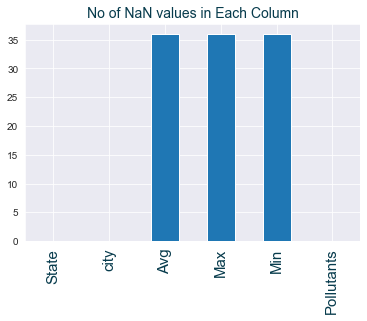

In [7]:
#set style
plt.rcParams['figure.figsize'] = [6, 4] 
sns.set_style('darkgrid')

#Plot missing values
data.isna().sum().plot(kind = 'bar')
plt.title("No of NaN values in Each Column",fontsize = 14,color = "#073B4C" )
plt.xticks(fontsize = 15,color = '#073B4C')
plt.show()

In [8]:
#There are several NaNs, for better analysis the rows are dropped
data = data[data['Avg'].notna()]

In [9]:
import warnings
warnings.filterwarnings("ignore")

# delete outliers of data by state and pollutant if they are not within the 75% and 25% of the data
for State in data.State.unique():
    temps = data[data.State == State]
    
    for pollutant in temps.Pollutants.unique():
        val = temps[temps.Pollutants == pollutant].Avg
        if len(val) > 3:
            q75,q25 = np.percentile(val,[75,25])
            intr_qr = q75-q25
            maxv = q75+(1.5*intr_qr)
            minv = q25-(1.5*intr_qr)
            try:
                data[data.State == State][data.Pollutants == pollutant][data.Avg < minv] = np.nan
            except:
                print("Nothing to change in " + State + " with " + pollutant)
            try:
                data[data.State == State][data.Pollutants == pollutant][data.Avg > maxv] = np.nan
            except:
                print("Nothing to change in " + State + " with " + pollutant)
        else:
            print("Few data ignored in " + State + " with " + pollutant)

Nothing to change in Andhra_Pradesh with PM2.5
Nothing to change in Andhra_Pradesh with PM2.5
Nothing to change in Andhra_Pradesh with PM10
Nothing to change in Andhra_Pradesh with PM10
Nothing to change in Andhra_Pradesh with NO2
Nothing to change in Andhra_Pradesh with NO2
Nothing to change in Andhra_Pradesh with NH3
Nothing to change in Andhra_Pradesh with NH3
Nothing to change in Andhra_Pradesh with SO2
Nothing to change in Andhra_Pradesh with SO2
Nothing to change in Andhra_Pradesh with CO
Nothing to change in Andhra_Pradesh with CO
Nothing to change in Andhra_Pradesh with OZONE
Nothing to change in Andhra_Pradesh with OZONE
Few data ignored in Bihar with PM2.5
Few data ignored in Bihar with NO2
Few data ignored in Bihar with SO2
Few data ignored in Bihar with CO
Few data ignored in Bihar with OZONE
Nothing to change in Delhi with PM2.5
Nothing to change in Delhi with PM2.5
Nothing to change in Delhi with PM10
Nothing to change in Delhi with PM10
Nothing to change in Delhi with NO

#### 3. Transforming pollution data to be displayed in a map

In [10]:
# importing geopandas and fuzzywuzzy
import geopandas as gpd
from fuzzywuzzy import process

#laoding file of India´s states
india = gpd.read_file(abspath+'/India States/Indian_states.shp')

In [11]:
#Make strings match in both .shp and data
def state_name_matching(df, geo_df):
    for name in df.State:
        result = process.extract(name, geo_df.st_nm, limit=1)
        df['State'] = df.State.str.replace(name, result[0][0], regex=False)

state_name_matching(data,india)

data.sample(10)

,State,city,Avg,Max,Min,Pollutants
735,Uttar Pradesh,Lucknow,17.0,127.0,8.0,CO
608,Rajasthan,Kota,187.0,352.0,53.0,PM2.5
522,Punjab,Jalandhar,72.0,102.0,50.0,PM10
448,Maharashtra,Chandrapur,27.0,52.0,14.0,NO2
470,Maharashtra,Nagpur,27.0,150.0,14.0,CO
100,NCT of Delhi,Delhi,11.0,15.0,7.0,NH3
210,NCT of Delhi,Delhi,6.0,11.0,4.0,SO2
812,West Bengal,Kolkata,57.0,121.0,4.0,NO2
475,Maharashtra,Nashik,4.0,5.0,4.0,NH3
181,NCT of Delhi,Delhi,307.0,445.0,189.0,PM10


In [12]:
#Create data for all the pollutants
CO_data =  data[data.Pollutants == "CO"].pivot_table(index='State',values='Avg',aggfunc='sum')
NO2_data =  data[data.Pollutants == "NO2"].pivot_table(index='State',values='Avg',aggfunc='sum')
OZONE_data =  data[data.Pollutants == "OZONE"].pivot_table(index='State',values='Avg',aggfunc='sum')
SO2_data =  data[data.Pollutants == "SO2"].pivot_table(index='State',values='Avg',aggfunc='sum')
NH3_data =  data[data.Pollutants == "NH3"].pivot_table(index='State',values='Avg',aggfunc='sum')
PM25_data =  data[data.Pollutants == "PM2.5"].pivot_table(index='State',values='Avg',aggfunc='sum')
PM10_data =  data[data.Pollutants == "PM10"].pivot_table(index='State',values='Avg',aggfunc='sum')

#### 4. Creating the GeoPandas objects

In [13]:
# Function for merging india Geo pandas with Avg_pollution by state
def merging_for_map(df, geo_df):
    merged_df = geo_df.merge(df,
                             left_on='st_nm',
                             right_on='State',
                             how='outer')
    merged_df = merged_df.rename(columns={'Avg': 'Avg_Pollution'})
    return merged_df

# Merging india geo panda with the pollution Data Frame
map_of_CO = merging_for_map(CO_data,india)
map_of_NO2 = merging_for_map(NO2_data,india)
map_of_OZONE = merging_for_map(OZONE_data,india)
map_of_SO2 = merging_for_map(SO2_data,india)
map_of_NH3 = merging_for_map(NH3_data,india)
map_of_PM25 = merging_for_map(PM25_data,india)
map_of_PM10 = merging_for_map(PM10_data,india)

#### 5. Data Visualization

In [14]:
#Set style
plt.rcParams['figure.figsize'] = [12, 8]
sns.set_style('white')

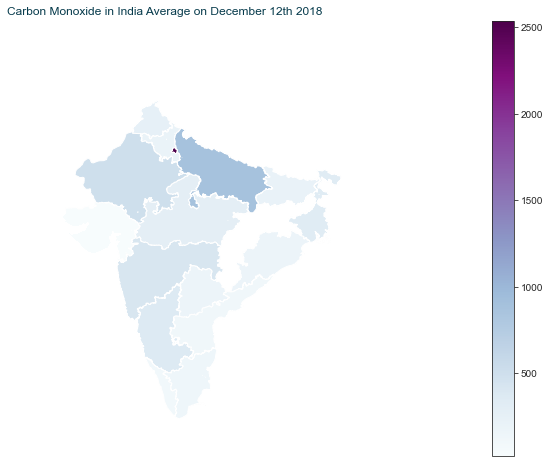

In [15]:
#
map_of_CO.plot(column='Avg_Pollution', cmap='BuPu', legend=True)
plt.title("Carbon Monoxide in India Average on December 12th 2018",x = 0.3,color = '#073B4C')
plt.axis('off')
plt.show()

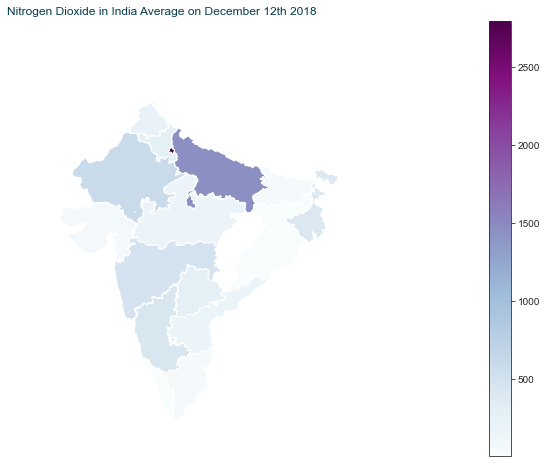

In [16]:
map_of_NO2.plot(column='Avg_Pollution', cmap='BuPu', legend=True)
plt.title("Nitrogen Dioxide in India Average on December 12th 2018",x = 0.3,color = '#073B4C')
plt.axis('off')
plt.show()

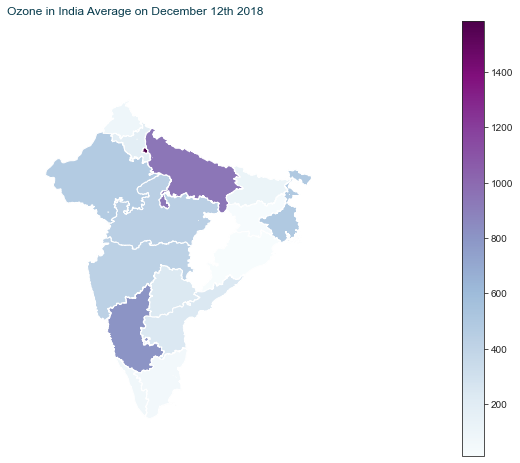

In [17]:
map_of_OZONE.plot(column='Avg_Pollution', cmap='BuPu', legend=True)
plt.title("Ozone in India Average on December 12th 2018",x = 0.3,color = '#073B4C')
plt.axis('off')
plt.show()

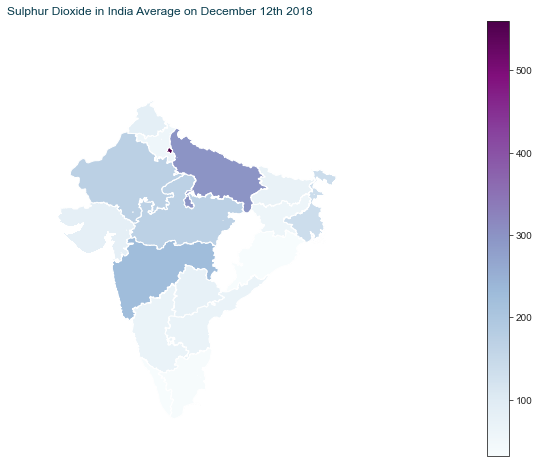

In [18]:
map_of_SO2.plot(column='Avg_Pollution', cmap='BuPu', legend=True)
plt.title("Sulphur Dioxide in India Average on December 12th 2018",x = 0.3,color = '#073B4C')
plt.axis('off')
plt.show()

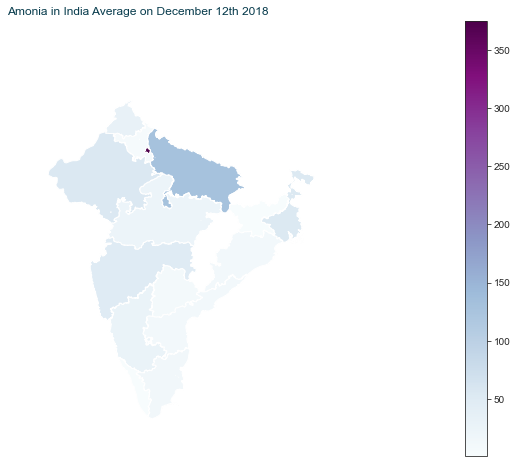

In [19]:
map_of_NH3.plot(column='Avg_Pollution', cmap='BuPu', legend=True)
plt.title("Amonia in India Average on December 12th 2018",x = 0.3,color = '#073B4C')
plt.axis('off')
plt.show()

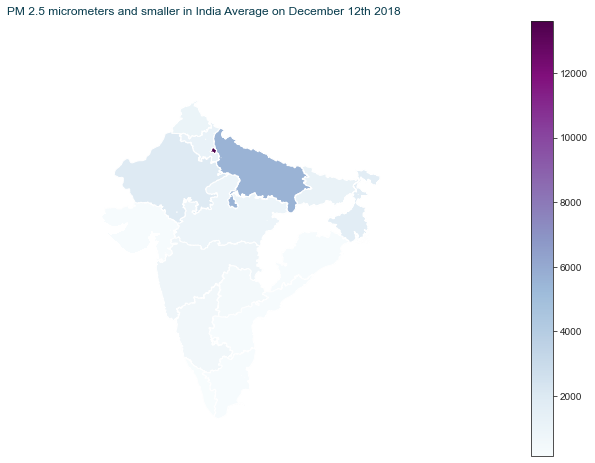

In [20]:
map_of_PM25.plot(column='Avg_Pollution', cmap='BuPu', legend=True)
plt.title("PM 2.5 micrometers and smaller in India Average on December 12th 2018",x = 0.3,color = '#073B4C')
plt.axis('off')
plt.show()

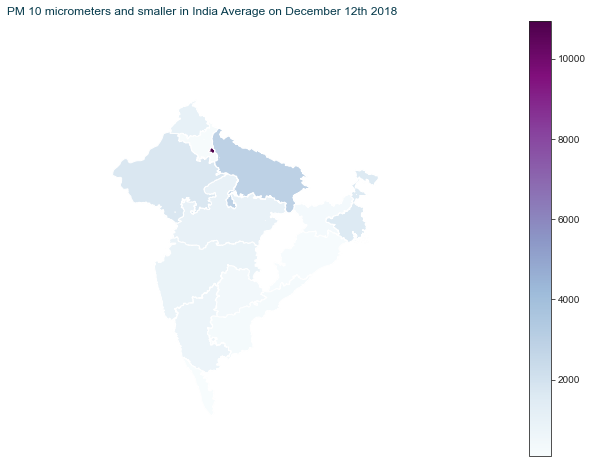

In [21]:
map_of_PM10.plot(column='Avg_Pollution', cmap='BuPu', legend=True)
plt.title("PM 10 micrometers and smaller in India Average on December 12th 2018",x = 0.3,color = '#073B4C')
plt.axis('off')
plt.show()